In [1]:
import numpy as np
import cv2
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

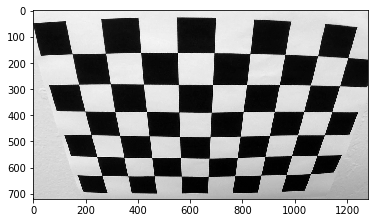

In [2]:
img = cv2.imread('camera_cal/calibration2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

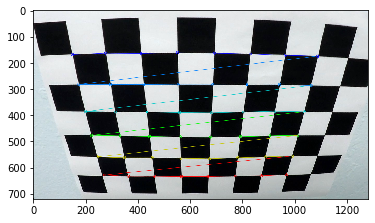

In [3]:

objpoints = []
imgpoints = []

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) #x,y coordinates

ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
    plt.imshow(img)

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [5]:
dst = cv2.undistort(img, mtx, dist, None, mtx)


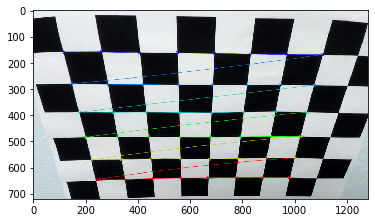

In [6]:
plt.imshow(dst)